<a href="https://colab.research.google.com/github/gulce0/IE-423/blob/main/Task_2_G%C3%BClce_Y%C4%B1ld%C4%B1z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inıtializing Step

In [ ]:
import pandas as pd
import numpy as np

# Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dfFootball = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Football/football_data.csv')

In [ ]:
dfFootball.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

# Selecting Data

***Prediction Target***

In [ ]:
y = dfFootball.loc[:,['current_value']]

print(dfFootball.columns)


Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')


***Choose Features***

\Features will be the columns used to determine de current value.

In [ ]:
X = dfFootball.loc[:,['age', 'award', 'red cards', 'appearance']]

In [ ]:
# View top few rows
X.head()

,age,award,red cards,appearance
0,32.0,13,0.0,104
1,30.0,1,0.0,15
2,37.0,4,0.0,4
3,25.0,9,0.0,82
4,30.0,21,0.0,63


In [ ]:
# Describe columns using basic stats
X.describe()

,age,award,red cards,appearance
count,10754.000000,10754.000000,10754.000000,10754.000000
mean,26.041903,1.960759,0.006826,36.407011
std,4.777629,3.743936,0.081143,26.526541
min,15.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,12.000000
50%,26.000000,1.000000,0.000000,35.000000
75%,29.000000,2.000000,0.000000,59.000000
max,43.000000,92.000000,6.923077,107.000000


# Building Model

### 1. Define

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer

# Eksik değerleri doldurmak için SimpleImputer kullanma
imputer_X = SimpleImputer(strategy='mean')
imputer_y = SimpleImputer(strategy='mean')

X = imputer_X.fit_transform(X)
y = y['current_value']

# X'i yeniden pandas DataFrame'e dönüştürme ve sütun isimlerini ekleme
X = pd.DataFrame(X, columns=['age', 'award', 'red cards', 'appearance'])

# Fix the seed to the random number generator to ensure same results each run.  DecisionTreeRegressor modeli tanımlanır ve bu model eğitim için hazır hale getirilir.
mdlDtrFootball = DecisionTreeRegressor(random_state=1)


### 2. Fit

In [ ]:
mdlDtrFootball.fit(X,y)

DecisionTreeRegressor(random_state=1)

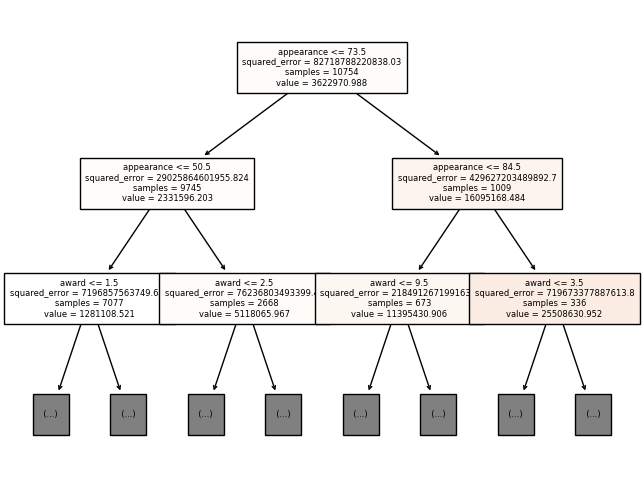

In [ ]:
# Show model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrFootball, max_depth=2, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

:*We fitted all data points (values of players) into the model by fitting step. We now have a fitted model that we can use to make predictions.*

### 3. Predict

In [ ]:
print('First few current values:')
print(X.head())
print('Current Value predictions:')
print(mdlDtrFootball.predict(X.head()))

First few current values:
    age  award  red cards  appearance
0  32.0   13.0        0.0       104.0
1  30.0    1.0        0.0        15.0
2  37.0    4.0        0.0         4.0
3  25.0    9.0        0.0        82.0
4  30.0   21.0        0.0        63.0
Current Value predictions:
[15000000.  1350000.   600000. 50000000. 40000000.]


In [ ]:
y.head()

0    15000000
1     1500000
2      600000
3    50000000
4    40000000
Name: current_value, dtype: int64

### 4. Evaluate

*We should look at how far away we are from actual current value. Difference will be the error.*

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred = mdlDtrFootball.predict(X)
print('MAE:')
print(mean_absolute_error(y,y_pred))

MAE:
804888.8083777928


*Since model is trained and tested on same data this MAE is called **in-sample score**. We want to make future predictions based on past data and in this case the model won't help us. We want **out-of-sample score**. We should split the data into training and test sets, for example 80% and 20% will work.*

In [ ]:
from sklearn.model_selection import train_test_split

# Split features and target into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=1)

In [ ]:
# Rebuild model
mdlDtrFootballSpl = DecisionTreeRegressor(random_state=1)
mdlDtrFootballSpl.fit(X_train, y_train)

# Predict test data
y_test_pred = mdlDtrFootballSpl.predict(X_test)

# Evaluate test data actual vs prediction
print('MAE (after train-test-split):')
print(mean_absolute_error(y_test,y_test_pred))

MAE (after train-test-split):
3752410.874233179


***MAE is bigger when you split the dataset into training and test sets.*** *The model is trained only on the training set and makes predictions on the test set, which it has not seen before. This usually results in a higher error.*

# Improving Decision Tree Model

*Now we will create a model with a specific max_leaf_nodes value for the DecisionTreeRegressor model and evaluate the performance of the model with the Mean Absolute Error (MAE) metric. max_leaf_nodes is a parameter specifies the maximum number of leaf nodes that the tree can have.  Leaf nodes represent the final decision. By limiting the number of leaf nodes, you can control the complexity of the tree. A very complex tree (with many leaf nodes) might overfit the training data.*

In [ ]:
# Function to build and return MAE for a given number of max_leaf_nodes
def get_mae(mx_lf_nds, X_trn, X_tst, y_trn, y_tst):
    mdlDtrFootballimp = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)
    mdlDtrFootballimp.fit(X_trn,y_trn)
    y_tst_prd = mdlDtrFootballimp.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(mae)

In [ ]:
# Iterate over a list of max_leaf_nodes to determine MAE across all
for i in [5, 50, 500, 50000]:
    mae = get_mae(i, X_train, X_test, y_train, y_test)
    print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  3401996.7945044828
Max leaf nodes:  50 	 Mean Absolute Error:  3135064.597142174
Max leaf nodes:  500 	 Mean Absolute Error:  3336672.9089231505
Max leaf nodes:  50000 	 Mean Absolute Error:  3685668.2738922522


*The best depth of the tree is at 50 max leaf nodes. It gives min error.*

# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define random forest model
mdlRfsFootball = RandomForestRegressor(random_state=1)

# Fit model
mdlRfsFootball.fit(X_train, y_train)

# Predict
y_test_pred = mdlRfsFootball.predict(X_test)

# Evaluate
print('MAE (Random Forest):')
print(mean_absolute_error(y_test,y_test_pred))

MAE (Random Forest):
3116326.0119714774


***In conclusion:***

MAE (Decision Tree without train-test split): 804,888.81

MAE (Decision Tree after train-test split): 3,752,410.87

MAE (Random Forest after train-test split): 3,116,326.01

Decision Tree model performs better on the entire dataset compared to when it is split into training and test sets. It is likely overfitting the training data. Random Forest Model has a lower MAE on test set compared to the decision tree model after train-test-split and it suggests that Random Forest is better to understand the unseen data than the Decision Tree model.